# KNN with original wide data

In [1]:
import pandas as pd
wide_data = pd.read_csv('wide1.csv')

k=1, ROC AUC Score: 0.654436667419282
k=2, ROC AUC Score: 0.6639196206818695
k=3, ROC AUC Score: 0.6953036802890042
k=4, ROC AUC Score: 0.7104312485888462
k=5, ROC AUC Score: 0.7204786633551591
k=6, ROC AUC Score: 0.7247685707834726
k=7, ROC AUC Score: 0.7365093700609617
k=8, ROC AUC Score: 0.7476857078347257
k=9, ROC AUC Score: 0.7655226913524498
k=10, ROC AUC Score: 0.7762474599232332
k=11, ROC AUC Score: 0.7803115827500565
k=12, ROC AUC Score: 0.7964551817566042
k=13, ROC AUC Score: 0.798713027771506
k=14, ROC AUC Score: 0.79747121246331
k=15, ROC AUC Score: 0.7983743508692708
k=16, ROC AUC Score: 0.7970196432603297
k=17, ROC AUC Score: 0.8066154888236623
k=18, ROC AUC Score: 0.8094377963422894
k=19, ROC AUC Score: 0.8078573041318582
k=20, ROC AUC Score: 0.8066154888236622
k=21, ROC AUC Score: 0.7981485662677805
k=22, ROC AUC Score: 0.7890042899074283
k=23, ROC AUC Score: 0.7815533980582524
k=24, ROC AUC Score: 0.7768119214269587
k=25, ROC AUC Score: 0.7761345676224881
k=26, ROC AUC

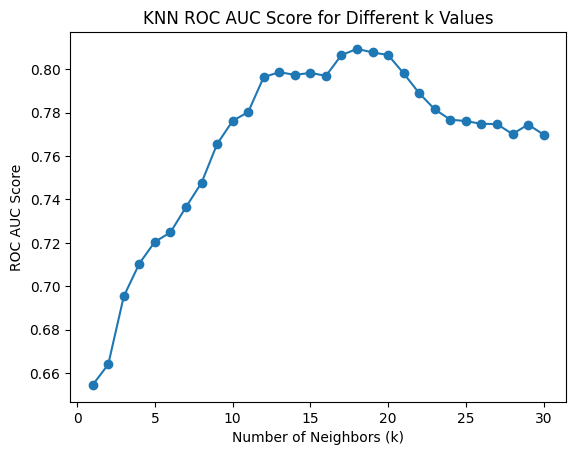

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Your data preparation steps
features = wide_data.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data['death']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Looping through different values of k
k_values = range(1, 31)
roc_auc_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)
    y_probs = knn.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores.append(roc_auc)
    print(f"k={k}, ROC AUC Score: {roc_auc}")

# Optionally, you can plot the ROC AUC scores to visualize the performance
plt.plot(k_values, roc_auc_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('ROC AUC Score')
plt.title('KNN ROC AUC Score for Different k Values')
plt.show()

ROC AUC Score: 0.8094377963422894


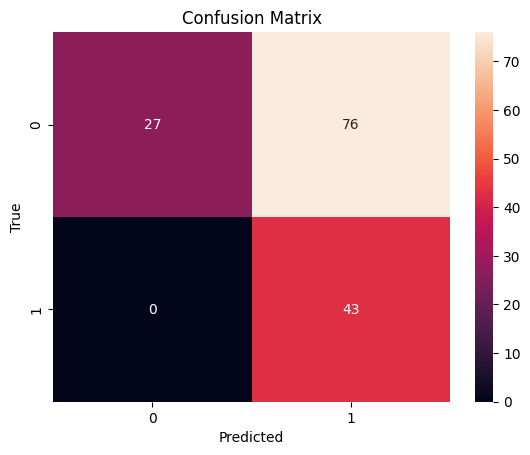

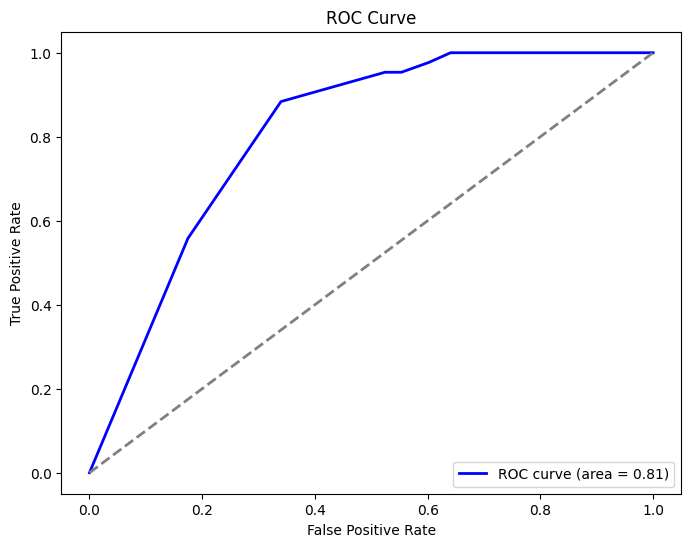

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

features = wide_data.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data['death']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_smote, y_train_smote)

y_pred = knn.predict(X_test)

y_probs = knn.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# KNN with correlated binary column drop

In [4]:
wide_data_dropped_bin = pd.read_csv('wide_data_dropped_bin.csv')

k=1, ROC AUC Score: 0.649582298487243
k=2, ROC AUC Score: 0.6621133438699481
k=3, ROC AUC Score: 0.6950778956875141
k=4, ROC AUC Score: 0.7104312485888462
k=5, ROC AUC Score: 0.7204786633551591
k=6, ROC AUC Score: 0.7247685707834726
k=7, ROC AUC Score: 0.7365093700609617
k=8, ROC AUC Score: 0.7476857078347257
k=9, ROC AUC Score: 0.7655226913524498
k=10, ROC AUC Score: 0.7762474599232332
k=11, ROC AUC Score: 0.7804244750508016
k=12, ROC AUC Score: 0.7964551817566042
k=13, ROC AUC Score: 0.798713027771506
k=14, ROC AUC Score: 0.79747121246331
k=15, ROC AUC Score: 0.7983743508692708
k=16, ROC AUC Score: 0.7970196432603297
k=17, ROC AUC Score: 0.8066154888236622
k=18, ROC AUC Score: 0.8094377963422894
k=19, ROC AUC Score: 0.8078573041318582
k=20, ROC AUC Score: 0.8066154888236622
k=21, ROC AUC Score: 0.7981485662677805
k=22, ROC AUC Score: 0.7890042899074283
k=23, ROC AUC Score: 0.7815533980582524
k=24, ROC AUC Score: 0.7768119214269587
k=25, ROC AUC Score: 0.7761345676224881
k=26, ROC AUC

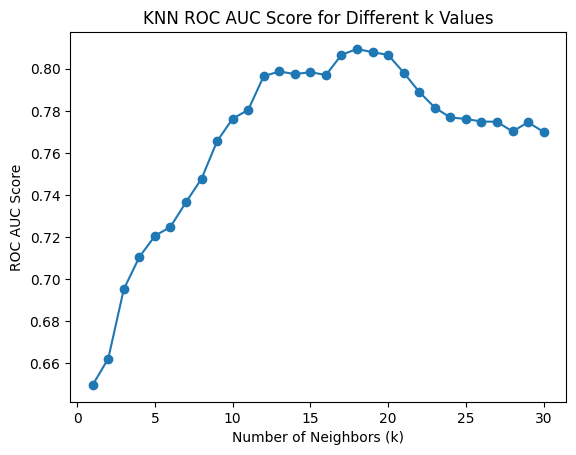

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Your data preparation steps
features = wide_data_dropped_bin.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data_dropped_bin['death']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Looping through different values of k
k_values = range(1, 31)
roc_auc_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)
    y_probs = knn.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores.append(roc_auc)
    print(f"k={k}, ROC AUC Score: {roc_auc}")

# Optionally, you can plot the ROC AUC scores to visualize the performance
plt.plot(k_values, roc_auc_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('ROC AUC Score')
plt.title('KNN ROC AUC Score for Different k Values')
plt.show()

ROC AUC Score: 0.8094377963422894


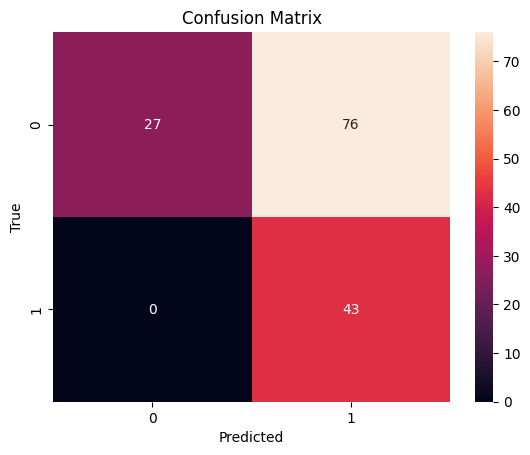

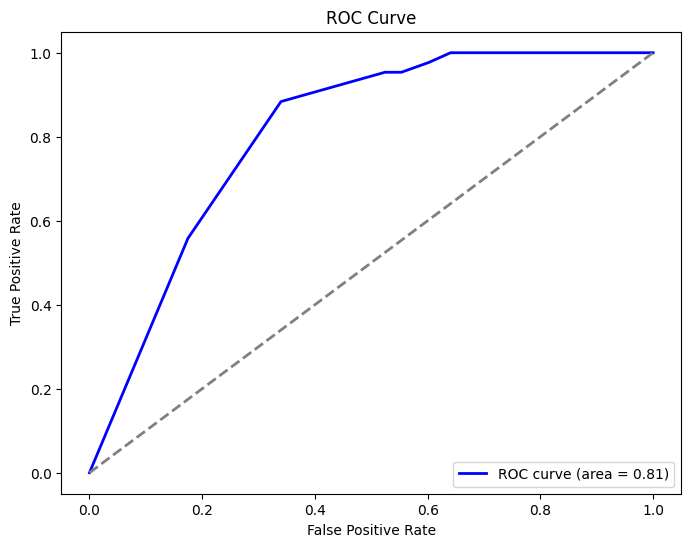

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

features = wide_data_dropped_bin.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data_dropped_bin['death']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_smote, y_train_smote)

y_pred = knn.predict(X_test)

y_probs = knn.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# KNN with scaled correlated column drop

In [7]:
wide_data_dropped_time = pd.read_csv('wide_data_dropped_time.csv')

k=1, ROC AUC Score: 0.654436667419282
k=2, ROC AUC Score: 0.6621133438699481
k=3, ROC AUC Score: 0.6950778956875141
k=4, ROC AUC Score: 0.7104312485888462
k=5, ROC AUC Score: 0.7204786633551591
k=6, ROC AUC Score: 0.7247685707834726
k=7, ROC AUC Score: 0.7365093700609617
k=8, ROC AUC Score: 0.7476857078347257
k=9, ROC AUC Score: 0.7655226913524498
k=10, ROC AUC Score: 0.7762474599232332
k=11, ROC AUC Score: 0.7803115827500565
k=12, ROC AUC Score: 0.7964551817566042
k=13, ROC AUC Score: 0.798713027771506
k=14, ROC AUC Score: 0.79747121246331
k=15, ROC AUC Score: 0.7983743508692708
k=16, ROC AUC Score: 0.7970196432603297
k=17, ROC AUC Score: 0.8066154888236623
k=18, ROC AUC Score: 0.8094377963422894
k=19, ROC AUC Score: 0.8078573041318582
k=20, ROC AUC Score: 0.8066154888236622
k=21, ROC AUC Score: 0.7981485662677805
k=22, ROC AUC Score: 0.7890042899074283
k=23, ROC AUC Score: 0.7815533980582524
k=24, ROC AUC Score: 0.7768119214269587
k=25, ROC AUC Score: 0.7761345676224881
k=26, ROC AUC

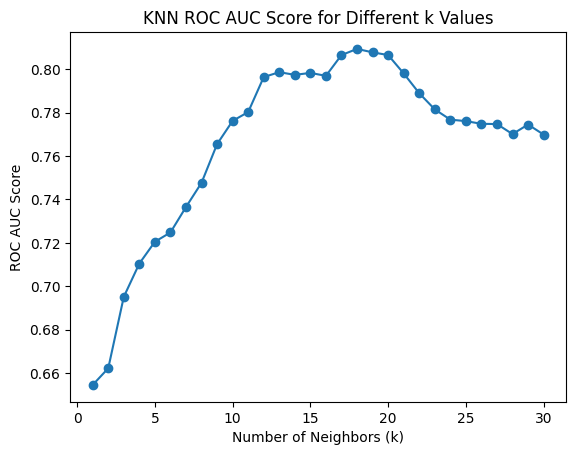

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Your data preparation steps
features = wide_data_dropped_time.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data_dropped_time['death']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Looping through different values of k
k_values = range(1, 31)
roc_auc_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)
    y_probs = knn.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores.append(roc_auc)
    print(f"k={k}, ROC AUC Score: {roc_auc}")

# Optionally, you can plot the ROC AUC scores to visualize the performance
plt.plot(k_values, roc_auc_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('ROC AUC Score')
plt.title('KNN ROC AUC Score for Different k Values')
plt.show()


ROC AUC Score: 0.8094377963422894


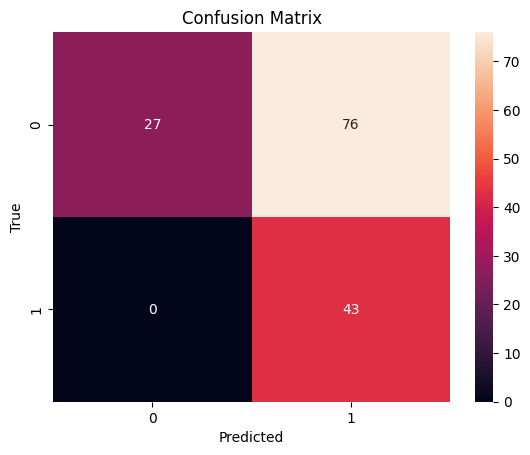

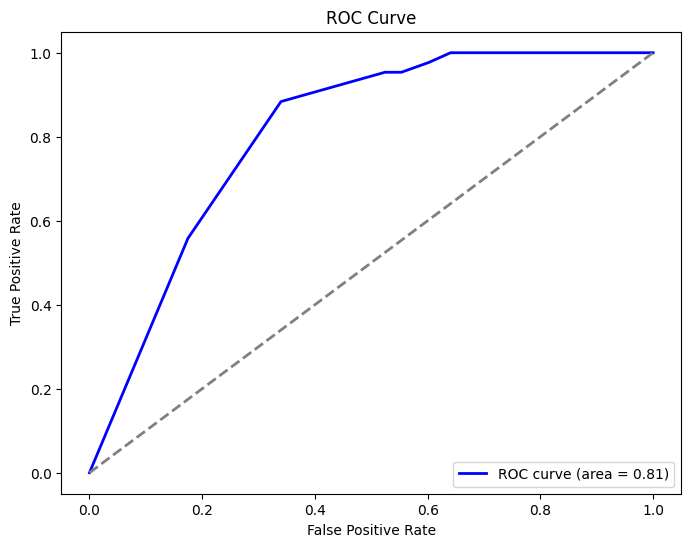

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

features = wide_data_dropped_time.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data_dropped_time['death']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_smote, y_train_smote)

y_pred = knn.predict(X_test)

y_probs = knn.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()